In [57]:
import pandas as pd
from nltk import word_tokenize, sent_tokenize
from nltk.lm.preprocessing import pad_both_ends, flatten, padded_everygram_pipeline
from sklearn.model_selection import train_test_split
import numpy as np

In [58]:
df = pd.read_csv("data/Donald-Tweets!.csv")
df.head(5)

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,NaN,NaN
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,NaN,NaN
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,NaN,NaN


In [59]:
df['trump_corpus'] = df['Tweet_Text'].apply(word_tokenize)
train_texts, val_texts = train_test_split(df['trump_corpus'], test_size=0.2, random_state=42)

In [60]:
# Preprocess the tokenized text for 3-grams language modelling
n = 3
train_data, padded_sents = padded_everygram_pipeline(n, train_texts)

In [61]:
from nltk.lm import MLE
trump_model = MLE(n)
trump_model.fit(train_data, padded_sents)

In [62]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
detokenize = TreebankWordDetokenizer().detokenize
def generate_sent(model, num_words, random_seed=42):
    """
    :param model: An ngram language model from `nltk.lm.model`.
    :param num_words: Max no. of words to generate.
    :param random_seed: Seed value for random.
    """
    content = []
    for token in model.generate(num_words, random_seed=random_seed):
        if token == '<s>':
            continue
        if token == '</s>':
            break
        content.append(token)
    return detokenize(content)

In [63]:
generate_sent(trump_model, num_words=20, random_seed=42)

'called #AmericaFirst #RNCinCLE https: //t.co/4S4pnx4Q6r https: //t.co/DDhsj9SZ03 https: //t.co/BnAveA5OuP'

In [64]:
generate_sent(trump_model, num_words=10, random_seed=0)

'piece on me . I heard that @ Morning_Joe at'

In [65]:
generate_sent(trump_model, num_words=50, random_seed=10)

'"@ aldeguer_elsa: @ realDonaldTrump at 22%, CRUZ 7.7%...https: //t.co/Okc8XajVnz'

In [66]:
print(generate_sent(trump_model, num_words=100, random_seed=52))

will MAKE AMERICA GREAT AGAIN! https: /_


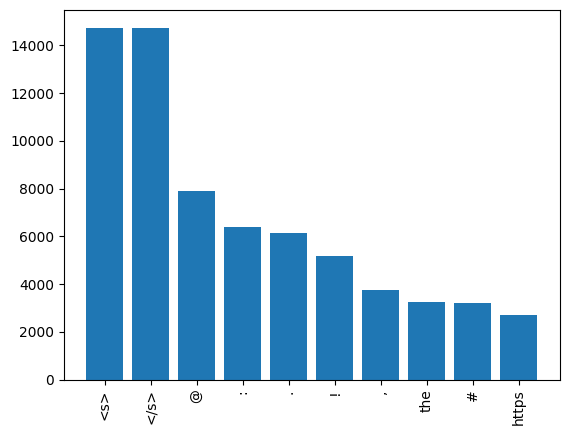

In [73]:
from collections import Counter
import matplotlib.pyplot as plt
def plot_ngram_frequencies(corpus, n):
    ngrams = list(flatten(pad_both_ends(word_tokenize(sentence), n) for sentence in corpus))
    ngrams_freq = Counter(ngrams)
    common_ngrams = ngrams_freq.most_common(10)
    labels, values = zip(*common_ngrams)
    plt.bar(labels, values)
    plt.xticks(rotation=90)
    plt.show()

plot_ngram_frequencies(df['Tweet_Text'], n)